<a href="https://colab.research.google.com/github/PPM5658/AI_app/blob/Done-with-Whole-planned-system/Object_testing_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics opencv-python-headless timm sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 84.3 MB/s eta 0:00:00


In [16]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
import torch
import google.generativeai as genai
from google.colab import userdata

In [4]:
print("Loading YOLOv8 model...")
model = YOLO('yolov8s.pt')
print("Model loaded successfully.")

Loading YOLOv8 model...
Model loaded successfully.


In [5]:
image_path = '/content/drive/MyDrive/Object tracking/Gemini_Generated_Image_6ewnwr6ewnwr6ewn.png'
try:
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    print("Image loaded successfully.")
except Exception as e:
    print(e)

Image loaded successfully.


Running object detection...

0: 1440x1440 2 cups, 1 bowl, 3 potted plants, 1 tv, 1 laptop, 1 keyboard, 64.6ms
Speed: 12.2ms preprocess, 64.6ms inference, 6.8ms postprocess per image at shape (1, 3, 1440, 1440)
Class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53

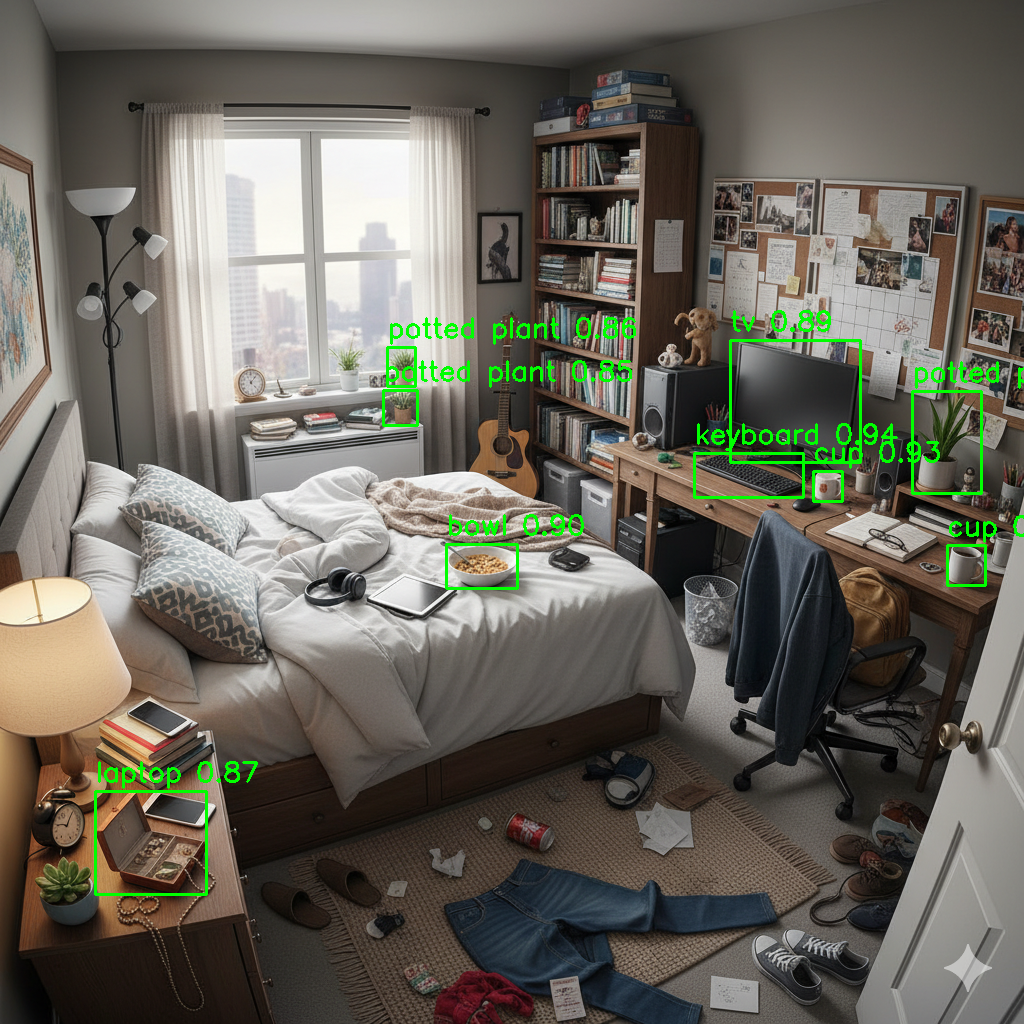

In [7]:
print("Running object detection...")
results = model(frame,conf=0.8,imgsz=1440)
class_names = results[0].names
print(f"Class names: {class_names}\n")

print(f"Found {len(results[0].boxes)} objects in the image.")

for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords


    confidence = box.conf[0].cpu().numpy()

    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]

    print(f"Object: {class_name} (ID: {class_id})")
    print(f"  - Confidence: {confidence:.2f}")
    print(f"  - Bounding Box: [x1:{x1}, y1:{y1}, x2:{x2}, y2:{y2}]")
    print("---")

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"{class_name} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(frame)

In [ ]:
video_path_in="/content/drive/MyDrive/Object tracking/test 2.mp4"
cap = cv2.VideoCapture(video_path_in)
if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path_in}")

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

print("Processing video frame by frame...")
frame_count = 0

Processing video frame by frame...


# Phase 2

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [11]:
print('Loading Model Midas')
model_type="MiDaS_small"
midas=torch.hub.load('intel-isl/MiDaS',model_type)

device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print('Model loaded successfully', device)

Loading Model Midas


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt


100%|██████████| 81.8M/81.8M [00:02<00:00, 34.1MB/s]

Model loaded successfully cuda


In [12]:
# Load transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Select transform based on model type
if model_type == "MiDaS_small":
    transform = midas_transforms.small_transform
else:
    transform = midas_transforms.dpt_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [13]:
frame=cv2.imread(image_path)
RGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
input_batch=transform(RGB).to(device)

Running inference...


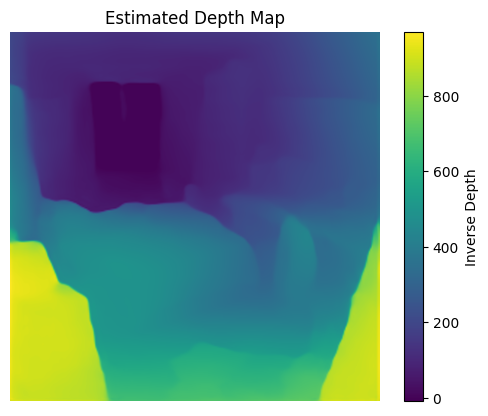

In [14]:
print("Running inference...")
with torch.no_grad():
    prediction=midas(input_batch)

    prediction=torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=frame.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
depth_map=prediction.cpu().numpy()
plt.imshow(depth_map, cmap='viridis')
plt.colorbar(label='Inverse Depth') # Add a color bar to show the scale
plt.title('Estimated Depth Map')
plt.axis('off')
plt.show()

Found 9 objects in the image.

Displaying results with manual drawings...


/tmp/ipython-input-880825521.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  distance_in_meters = 33/ depth_value


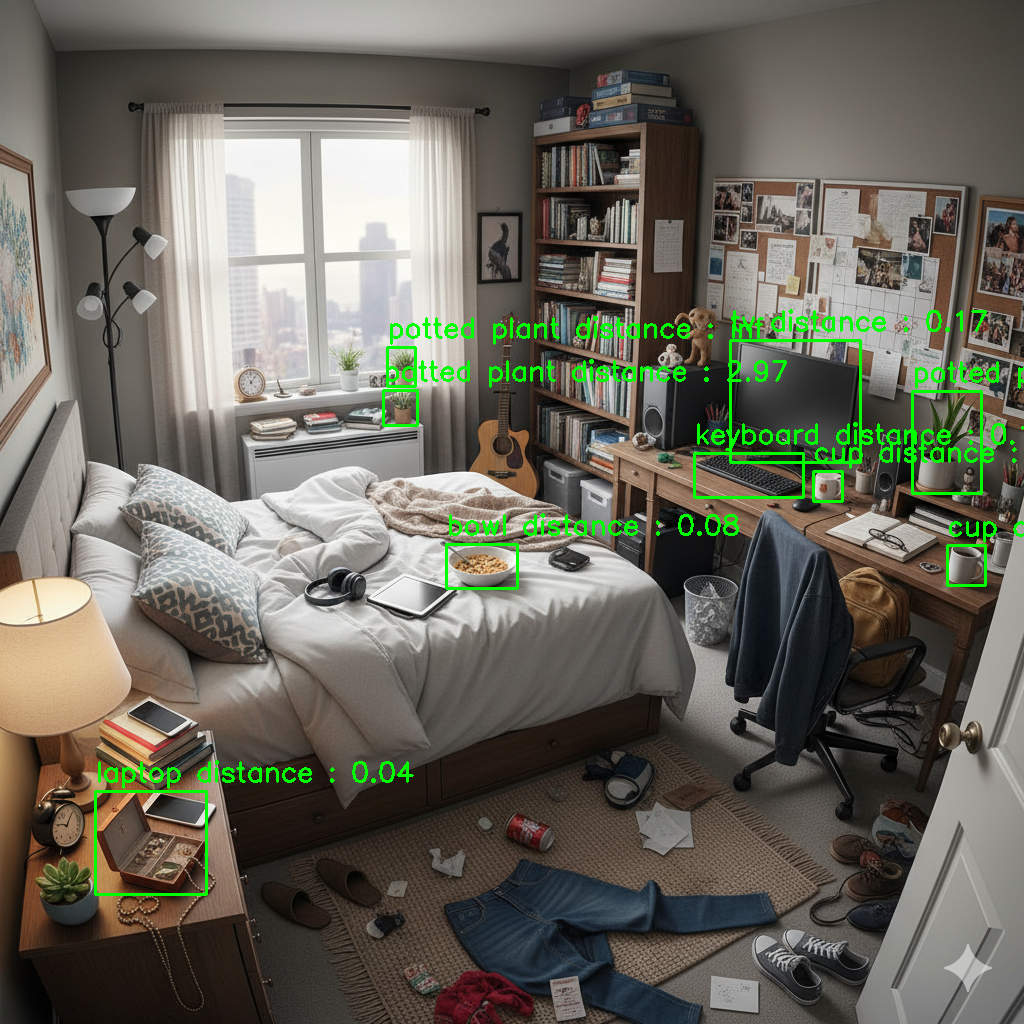

In [15]:
result = results[0]
class_names = result.names

print(f"Found {len(result.boxes)} objects in the image.")


for box in result.boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords
    center_x = int((x1 + x2) / 2)
    center_y = int((y1 + y2) / 2)
    start_x = max(center_x - 5, 0)
    end_x = min(center_x + 5, depth_map.shape[1])
    start_y = max(center_y - 5, 0)
    end_y = min(center_y + 5, depth_map.shape[0])
    depth_region = depth_map[start_y:end_y, start_x:end_x]
    depth_value = np.median(depth_region)

    confidence = box.conf[0].cpu().numpy()
    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    distance_in_meters = 33/ depth_value
    label_text = f"{class_name} distance : {distance_in_meters:.2f}"
    cv2.putText(frame, label_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
print("\nDisplaying results with manual drawings...")
cv2_imshow(frame)

In [ ]:
class ObjectMemoryTracker:
    def __init__(self, model, midas, transform, device):
        self.model = model
        self.midas = midas
        self.transform = transform
        self.device = device
        self.em_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
        self.memory_log = []
        self.known_ids = set()
        self.vector_database = None

        # --- NEW: Add the candidate tracker to the class initializer ---
        # This dictionary will store potential new objects and their sighting counts.
        self.candidate_objects = {}

    def process_frame(self, frame, timestamp):
        # Depth estimation
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        input_batch = self.transform(img_rgb).to(self.device)
        with torch.no_grad():
            prediction = self.midas(input_batch)
            prediction = torch.nn.functional.interpolate(
                prediction.unsqueeze(1), size=img_rgb.shape[:2], mode="bicubic", align_corners=False
            ).squeeze()
        depth_map = prediction.cpu().numpy()

        # Object tracking
        results = self.model.track(frame, persist=True, conf=0.5)
        if results[0].boxes.id is None:
            return frame, self.memory_log  # No tracked objects

        boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
        track_ids = results[0].boxes.id.cpu().numpy().astype(int)
        class_ids = results[0].boxes.cls.cpu().numpy().astype(int)

        annotated_frame = frame.copy()
        closest_dist = float('inf')
        closest_box = None

        for box, track_id, class_id in zip(boxes, track_ids, class_ids):
            x1, y1, x2, y2 = box
            center_x, center_y = int((x1 + x2) / 2), int((y1 + y2) / 2)

            # Using median for more robust distance
            start_x = max(center_x - 5, 0); end_x = min(center_x + 5, depth_map.shape[1])
            start_y = max(center_y - 5, 0); end_y = min(center_y + 5, depth_map.shape[0])
            depth_region = depth_map[start_y:end_y, start_x:end_x]
            depth_value = np.median(depth_region)

            distance = 33 / depth_value if depth_value > 0 else float('inf')

            class_name = self.model.names[class_id]
            label = f"ID:{track_id} {class_name} | {distance:.2f}m"
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(annotated_frame, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            if distance < closest_dist:
                closest_dist = distance
                closest_box = box

            # --- NEW: Replaced the old memory logic with this robust version ---
            # This is the "detection stability" logic.
            if track_id not in self.known_ids:
                # This is a potential new object, let's track it as a candidate.
                self.candidate_objects[track_id] = self.candidate_objects.get(track_id, 0) + 1

                # Only confirm and add to memory if we've seen it for 3 consecutive frames.
                if self.candidate_objects[track_id] >= 3:
                    # It's a stable detection! NOW we add it to the permanent memory.
                    description = f"At {timestamp:.1f}s, a new object '{class_name}' (ID: {track_id}) appeared at {distance:.2f}m."
                    self.memory_log.append(description)
                    self.known_ids.add(track_id)
                    # Clean up: remove the confirmed object from the candidate list.
                    del self.candidate_objects[track_id]

        if closest_box is not None:
            x1, y1, x2, y2 = closest_box
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4)
            cv2.putText(annotated_frame, "Closest", (x1, y2 + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        return annotated_frame, self.memory_log

    def build_vector_database(self):
        # ... (This method remains the same)
        if not self.memory_log: return None
        embeddings = self.em_model.encode(self.memory_log)
        dim = embeddings.shape[1]
        self.vector_database = faiss.IndexFlatL2(dim)
        self.vector_database.add(embeddings.astype('float32'))
        return self.vector_database

    def query_memory(self, query_text, top_k=5):
        # ... (This method remains the same)
        if self.vector_database is None: return []
        query_embedding = self.em_model.encode([query_text]).astype('float32')
        D, I = self.vector_database.search(query_embedding, top_k)
        return [self.memory_log[i] for i in I[0]]

In [ ]:
def answer_question(llm, tracker, question):

    print(f"\n🤔 User Question: \"{question}\"")
    print("looking through memories...")

    # 1. Retrieve context from the tracker's memory
    context = tracker.query_memory(question, top_k=5)
    context_string = "\n".join(context)

    print("Found relevant memories:")
    for mem in context:
        print(f"  - {mem}")

    # 2. Create the prompt for the LLM
    prompt = f"""
You are an AI assistant with a perfect memory of a video you just watched.
Your task is to answer the user's question. Use the following chronologically ordered facts from your memory as your primary source of truth.
Synthesize these facts into a helpful, conversational answer.
If the provided memory context does not contain enough information, state that you don't have a clear memory of that specific event.

--- MEMORY CONTEXT ---
{context_string}
--- END OF MEMORY ---

User Question: {question}

Answer:
"""

    try:
        print("\n🤖 Generating final answer with Gemini...")
        response = llm.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"❌ An error occurred while generating the answer: {e}")
        return "Sorry, I encountered an error while trying to generate a response."

In [ ]:
print("🚀 Starting the Visual Memory System...")

# Configure Gemini API
llm = None
try:

    api_key = userdata.get('gemini') # Using Colab secrets
    genai.configure(api_key=api_key)
    llm = genai.GenerativeModel('gemini-2.5-flash')
    print("✅ Gemini API configured successfully.")
except Exception as e:
    print(f"❌ Error configuring Gemini API: {e}")

video_path = "/content/drive/MyDrive/Object tracking/test 3.mp4" # <--- SET YOUR VIDEO FILE PATH HERE
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print(f"❌ Error: Could not open video file at {video_path}")

tracker = ObjectMemoryTracker(model, midas, transform, device)


print("\nProcessing video to build memory. This may take a moment...")
frame_count = 0
while cap.isOpened():
    success, frame = cap.read()
    if not success: break
    frame_count += 1

    # NEW: Only run the AI on every 3rd frame
    if frame_count % 3 == 0:
      timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
    # We process the frame, which internally calls _add_to_memory
      annotated_frame, memory_log = tracker.process_frame(frame, timestamp) # Capture memory_log

cap.release()

print("\n✅ Video processing complete. Memory has been built.")

tracker.build_vector_database()
print("✅ Vector database built.")

🚀 Starting the Visual Memory System...
✅ Gemini API configured successfully.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Processing video to build memory. This may take a moment...
requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


0: 384x640 1 bottle, 4 chairs, 1 dining table, 1 laptop, 100.0ms
Speed: 2.5ms preprocess, 100.0ms inference, 20.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 4 chairs, 1 dining table, 1 laptop, 10.8ms
Speed: 2.6ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 3 chairs, 1 dining table, 1 laptop, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 cup, 4 chairs, 1 dining table, 1 laptop, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 cup, 4 chairs, 1 dining table, 1 laptop,

In [ ]:
print("\n========================================")
print("      Now you can ask questions!")
print("========================================")

if llm is not None:
    final_answer_1 = answer_question(llm, tracker, "What was the first thing you saw?")
    print("\nFinal Answer 1:\n", final_answer_1)
    print("-" * 30)

    final_answer_2 = answer_question(llm, tracker, "Was there a person in the whole video?")
    print("\nFinal Answer 2:\n", final_answer_2)
    print("-" * 30)

    final_answer_3 = answer_question(llm, tracker, "Did you see any laptops?")
    print("\nFinal Answer 3:\n", final_answer_3)
    print("-" * 30)
else:
    print("\nSkipping questioning as Gemini API was not configured.")


      Now you can ask questions!

🤔 User Question: "What was the first thing you saw?"
looking through memories...
Found relevant memories:
  - At 0.1s, a new object 'chair' (ID: 217) appeared at 0.05m.
  - At 3.9s, a new object 'chair' (ID: 249) appeared at 0.06m.
  - At 0.1s, a new object 'chair' (ID: 233) appeared at 0.07m.
  - At 5.8s, a new object 'chair' (ID: 253) appeared at 0.06m.
  - At 1.7s, a new object 'chair' (ID: 239) appeared at 0.09m.

🤖 Generating final answer with Gemini...

Final Answer 1:
 Based on my memory, the very first thing I saw was a chair (ID: 217) which appeared at 0.1 seconds.
------------------------------

🤔 User Question: "Was there a person in the whole video?"
looking through memories...
Found relevant memories:
  - At 5.8s, a new object 'chair' (ID: 253) appeared at 0.06m.
  - At 4.7s, a new object 'chair' (ID: 250) appeared at 0.09m.
  - At 0.2s, a new object 'chair' (ID: 237) appeared at 0.06m.
  - At 0.7s, a new object 'chair' (ID: 240) appeared